In [22]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
df = pd.read_csv('./datasets/NMSendataset_preprocessedreviews_second_ngram.csv', error_bad_lines=False);
df

C:\Users\researcher\AppData\Local\Temp\ipykernel_5020\912866876.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./datasets/NMSendataset_preprocessedreviews_second_ngram.csv', error_bad_lines=False);


,id,content,recommend,preprocessed_reviews,ngram
0,5f6dd565f4cad2d04e204fbf,"['great', 'comeback']",True,great comeback,"['great', 'comeback']"
1,5f6dd584f4cad2d04e204fc3,"['thank', 'give']",True,thank give,"['thank', 'give']"
2,5f6dd6afae51f158b149a657,"['thank', 'internet', 'historian', 'cool']",True,thank internet historian cool,"['thank', 'internet_historian', 'cool']"
3,5f6e1014e0896bfb2a6117b5,"['real', 'heart', 'team', 'never', 'ever', 'gi...",True,real heart team never ever give like,"['real', 'heart', 'team', 'never', 'ever', 'gi..."
4,5f6e1027e0896bfb2a6117b8,"['never', 'write', 'review', 'anything', 'chan...",True,never write review anything change discover ma...,"['never', 'write', 'review', 'anything', 'chan..."
...,...,...,...,...,...
97993,5f83ee6d42346b555266bd30,"['space', 'engineer', 'destiny', 'no', 'mans',...",True,space engineer destiny mans sky like space lik...,"['space_engineer', 'destiny', 'mans', 'sky', '..."
97994,5f83ee7542346b555266bd34,"['first', 'work', 'fine', 'make', 'feel', 'alo...",False,first work fine make feel alone nice soundtrac...,"['first', 'work', 'fine', 'feel', 'alone', 'ni..."
97995,5f83ee7942346b555266bd36,"['far', 'good', 'edit', 'play', 'least', 'make...",False,far good edit play least make comment feel mar...,"['far', 'good', 'edit', 'play', 'least', 'comm..."
97996,5f83ee7b42346b555266bd37,"['feel', 'like', 'play', 'early', 'alpha', 'pr...",False,feel like play early alpha prerelease many thi...,"['feel', 'like', 'play', 'early_alpha', 'prere..."


In [24]:
# eval(df['ngram'][4])

In [25]:
def convert(s):
    s = eval(s)
    s = ' '.join(s)
    return s
df['ngram'] = df['ngram'].apply(convert)

In [26]:
documents  = df['ngram']
documents 

0                                           great comeback
1                                               thank give
2                            thank internet_historian cool
3                     real heart team never ever give like
4        never write review anything change discover ma...
                               ...                        
97993    space_engineer destiny mans sky like space lik...
97994    first work fine feel alone nice soundtrack sou...
97995    far good edit play least comment feel marmite ...
97996    feel like play early_alpha prerelease many thi...
97997    pretty good honest edit pretty good sean lie m...
Name: ngram, Length: 97998, dtype: object

In [27]:
data = df.ngram.values.tolist()
data[:3]

['great comeback', 'thank give', 'thank internet_historian cool']

In [28]:
# Using BoW
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

In [29]:
# Using TFIDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Elbow Method

In [36]:
def find_optimal_clusters(documents, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        model = KMeans(n_clusters=k)
        model.fit(documents)
        sse.append(model.inertia_)
        print(f"Fit {k} clusters")

    plt.figure(figsize=(20, 6))
    plt.plot(iters, sse, marker='o')
    plt.xticks(iters)

    plt.xlabel('Cluster Centers')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.show()

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


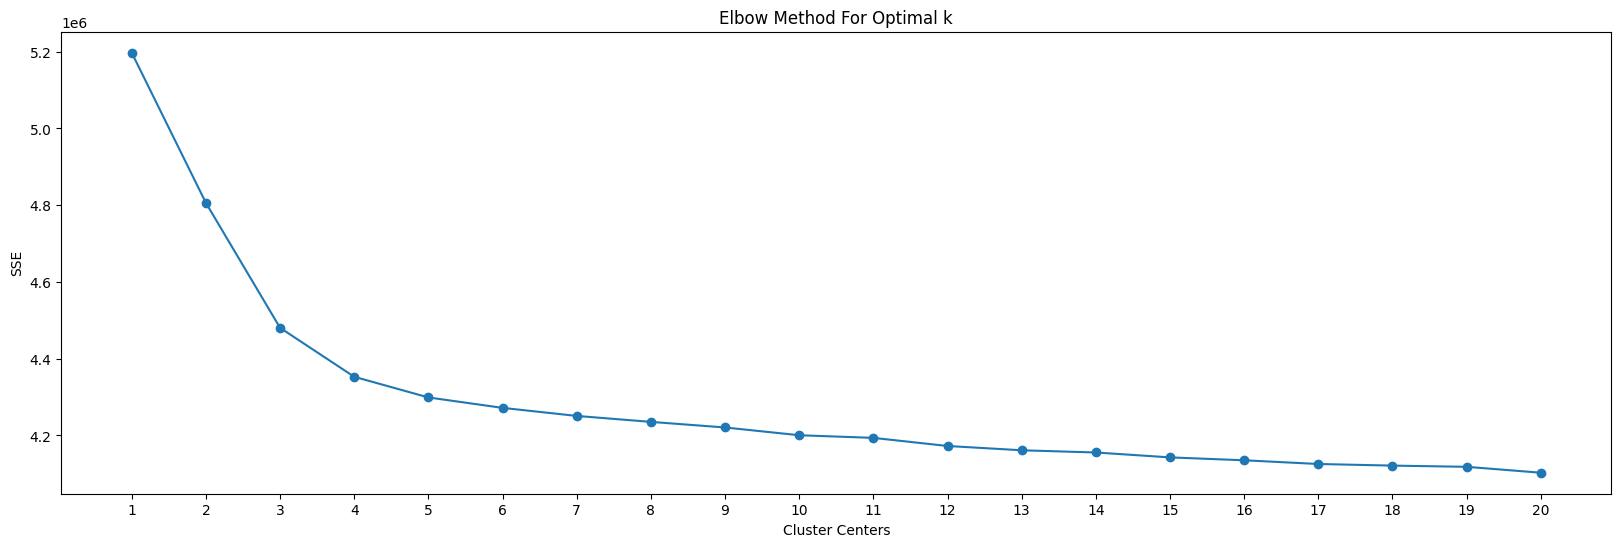

In [38]:
# Using BoW
find_optimal_clusters(X_bow, 20)

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters


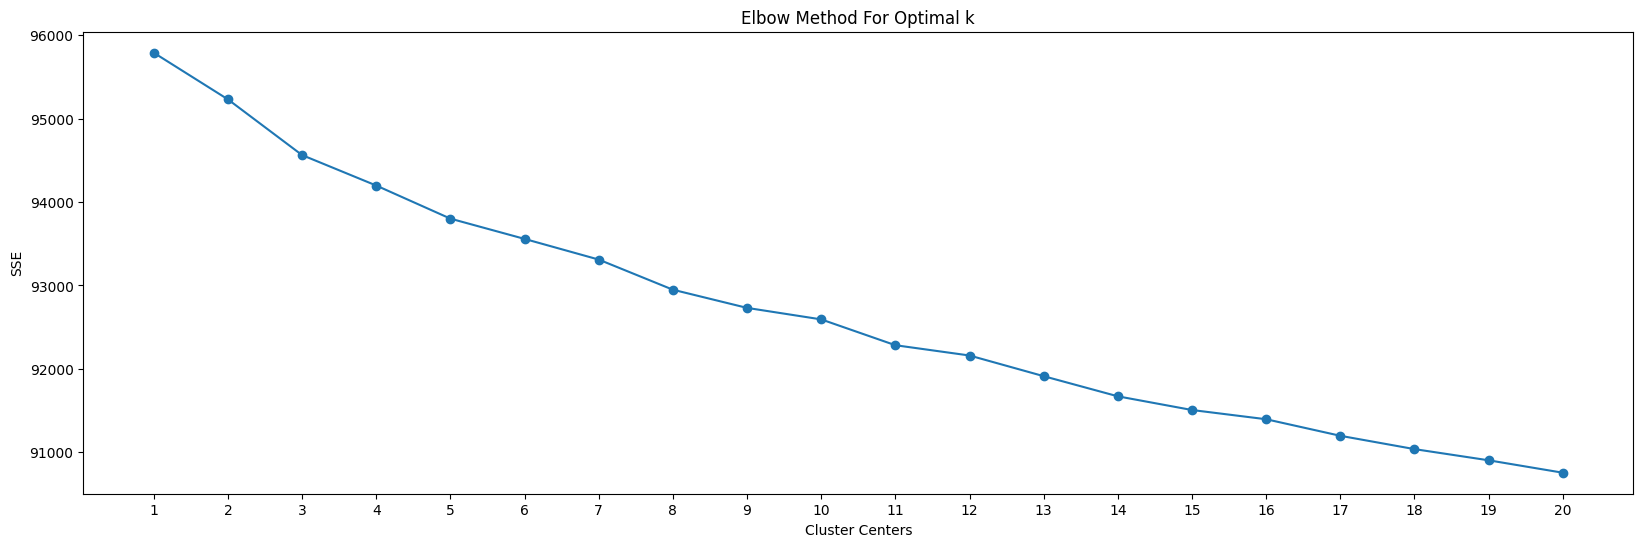

In [39]:
# Using TFIDF
find_optimal_clusters(X_tfidf, 20)

In [50]:
# Optimal number of clusters determined by the elbow method
optimal_bow_k = 3 #4,3
optimal_tfidf_k = 5 #5,6

# K-means on BoW
kmeans_bow = KMeans(n_clusters=optimal_bow_k, random_state=0)
kmeans_bow.fit(X_bow)

# K-means on TFIDF
kmeans_tfidf = KMeans(n_clusters=optimal_tfidf_k, random_state=0)
kmeans_tfidf.fit(X_tfidf)

D:\Software\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [51]:
def get_top_words(kmeans_model, vectorizer, n_words=10):
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    clusters_top_words = {}

    for i in range(optimal_bow_k):
        top_words = [terms[ind] for ind in order_centroids[i, :n_words]]
        clusters_top_words[f'Cluster {i+1}'] = top_words

    return clusters_top_words

# Get top words for BoW clusters
top_words_bow = get_top_words(kmeans_bow, bow_vectorizer)

print("Top Words per Cluster for BoW:")
df_bow = pd.DataFrame(top_words_bow)
print(df_bow)

Top Words per Cluster for BoW:
  Cluster 1 Cluster 2            Cluster 3
0       get    planet                  buy
1      like       get                 zuma
2      play      like         frankenstein
3    update      ship     frame_rate_hitch
4      hour        go  frame_rate_hitching
5      time      time   frame_rate_limiter
6    planet       one          frame_rated
7      good     thing          frame_rates
8        go      play               framed
9       fun       see               framer


In [45]:
def get_top_words(kmeans_model, vectorizer, n_words=10):
    order_centroids = kmeans_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    clusters_top_words = {}

    for i in range(optimal_tfidf_k):
        top_words = [terms[ind] for ind in order_centroids[i, :n_words]]
        clusters_top_words[f'Cluster {i+1}'] = top_words

    return clusters_top_words
# Get top words for TFIDF clusters
top_words_tfidf = get_top_words(kmeans_tfidf, tfidf_vectorizer)

print("\nTop Words per Cluster for TFIDF:")
df_tfidf = pd.DataFrame(top_words_tfidf)
print(df_tfidf)


Top Words per Cluster for TFIDF:
  Cluster 1 Cluster 2 Cluster 3    Cluster 4 Cluster 5
0     great       get      good       update       fun
1       buy      like    pretty          new       lot
2     worth    planet    update         next      play
3      play      hour  actually          get    friend
4       get      play       bad      release       get
5       bad      time       get        great      hour
6      love        go       job       launch   explore
7    refund     thing      play  hello_games     great
8      like   explore    smiley        still      much
9     still      ship      like         play      like
